In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "enter your drive working directory path"

In [ ]:
import pandas as pd
from keras import models
from keras import layers, optimizers
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x
    """
    min_val = np.min(x)
    max_val = np.max(x)
   
    x = (x-min_val) / (max_val-min_val)
    return x

In [ ]:
allData = pd.read_excel(r'Data.xlsx', sheet_name='Tablo1')


In [ ]:
# read label 1,2,3,....9
Y_temp = allData['nm'].head(1575)
Y_temp_one_hot_encoding = to_categorical(Y_temp)



In [ ]:
Y_temp_one_hot_encoding

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
#read nm values 18 column for each sample
#x = allData.iloc[:, 2:20]
#x = x.replace(',','.')
X_temp = np.array(allData.iloc[:, 2:20])
X_temp = X_temp.astype(np.float)


In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
# normalize all sample
X_temp_normalized2 = normalize(X_temp)

In [ ]:
from sklearn.model_selection import train_test_split
# split data set as 20% test 80% train
X_train, X_test, y_train, y_test = train_test_split(X_temp_normalized2, Y_temp_one_hot_encoding, test_size=0.2, random_state=368)

In [ ]:
#save test data 

np.savetxt("test_data20percent.csv", X_test, delimiter=",")
np.savetxt("test_data_Label20percent.csv", y_test, delimiter=",")


In [ ]:
def build_conv1D_model():

  n_timesteps = train_data_reshaped.shape[1] #18
  n_features  = train_data_reshaped.shape[2] #1 
  model = models.Sequential(name="model_conv1D")
  model.add(layers.Input(shape=(n_timesteps,n_features)))
  model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_1"))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', name="Conv1D_2"))  
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', name="Conv1D_3"))
  
  model.add(layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(layers.Dense(64, activation='relu', name="Dense_2"))
  
  model.add(layers.Dense(10, activation='softmax'))
  #model.add(layers.Dense(18, name="Dense_2"))

  
  optimizer = optimizers.RMSprop(0.001)

  model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
  return model
 

In [ ]:

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 16, 32)            128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 32)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 14, 64)            6208      
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 12, 64)            12352     
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 6, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)              

In [ ]:
# şimdi aynı eğitim ve test işini cnn ile yapalım
X_train.shape
X_train[0]
sample_size = X_train.shape[0]
time_steps = X_train.shape[1]
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped =  X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

test_data_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print("After reshape test data set shape:\n", test_data_reshaped.shape)
print("1 Sample shape:\n",test_data_reshaped[0].shape)
print("An example sample:\n", test_data_reshaped[0])



**Train the model**

The model is trained for 500 epochs, and record the training and validation accuracy in the history object.

In [ ]:
# Store training stats
history = model_conv1D.fit(train_data_reshaped, y_train, epochs=500,validation_split=0.25, verbose=1)

Epoch 1/500
30/30 [==============================] - 1s 10ms/step - loss: 2.2683 - accuracy: 0.1515 - val_loss: 1.9331 - val_accuracy: 0.1968
Epoch 2/500
30/30 [==============================] - 0s 5ms/step - loss: 1.8110 - accuracy: 0.2488 - val_loss: 1.5608 - val_accuracy: 0.2317
Epoch 3/500
30/30 [==============================] - 0s 6ms/step - loss: 1.5268 - accuracy: 0.2991 - val_loss: 1.4844 - val_accuracy: 0.2635
Epoch 4/500
30/30 [==============================] - 0s 6ms/step - loss: 1.4635 - accuracy: 0.3324 - val_loss: 1.4249 - val_accuracy: 0.3365
Epoch 5/500
30/30 [==============================] - 0s 5ms/step - loss: 1.3803 - accuracy: 0.3907 - val_loss: 1.3246 - val_accuracy: 0.3333
Epoch 6/500
30/30 [==============================] - 0s 5ms/step - loss: 1.3813 - accuracy: 0.3275 - val_loss: 1.2818 - val_accuracy: 0.3746
Epoch 7/500
30/30 [==============================] - 0s 5ms/step - loss: 1.2745 - accuracy: 0.4233 - val_loss: 1.2259 - val_accuracy: 0.4476
Epoch 8/500


In [ ]:
# plot results metrics and save all metric data to .txt file 
numpy_accuracy= np.array(result.history['accuracy'])
np.savetxt("train_accuracy2.txt", numpy_accuracy, delimiter=",")

numpy_val_accuracy= np.array(result.history['val_accuracy'])
np.savetxt("val_accuracy2.txt", numpy_val_accuracy, delimiter=",")


numpy_loss= np.array(result.history['loss'])
np.savetxt("train_loss2.txt", numpy_loss, delimiter=",")

numpy_val_loss= np.array(result.history['val_loss'])
np.savetxt("val_loss2.txt", numpy_val_loss, delimiter=",")

In [ ]:
# save model
model_conv1D.save('gidaAnalizModel_1D_CNN.h5')


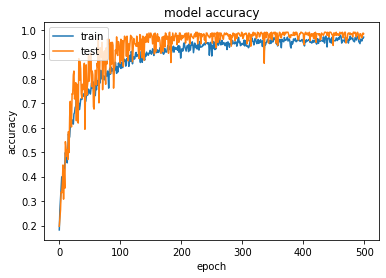

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

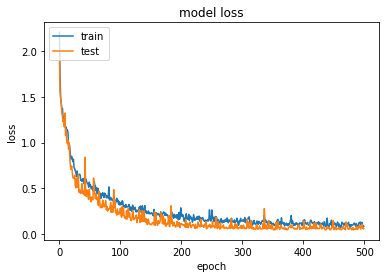

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

model_conv1D.evaluate(test_data_reshaped, y_test, verbose=0)


[0.13770407438278198, 0.9714285731315613]

In [ ]:
numpy_accuracy= np.array(history.history['accuracy'])
np.savetxt("train_accuracy.txt", numpy_accuracy, delimiter=",")

numpy_val_accuracy= np.array(history.history['val_accuracy'])
np.savetxt("val_accuracy.txt", numpy_val_accuracy, delimiter=",")


numpy_loss= np.array(history.history['loss'])
np.savetxt("train_loss.txt", numpy_loss, delimiter=",")

numpy_val_loss= np.array(history.history['val_loss'])
np.savetxt("val_loss.txt", numpy_val_loss, delimiter=",")

In [ ]:
a = test_data_reshaped[0]
a.shape
b = model_conv1D.predict(test_data_reshaped)
test_data_reshaped.shape


(315, 18, 1)

In [ ]:
c1 = test_data_reshaped[314]
c1.shape
c2 = c1.reshape(1, c1.shape[0],c1.shape[1])
c2.shape
b = model_conv1D.predict(c2)
c = np.argmax(b)
c

1

In [ ]:
i = 0
for x in range(315):
  c1 = test_data_reshaped[x]
  c2 = c1.reshape(1, c1.shape[0],c1.shape[1])
  b = model_conv1D.predict(c2)
  c = np.argmax(b)
  print("y_test = {0}  predict =  {1}".format(np.argmax(y_test[x]), c))
  i = i + 1


y_test = 9  predict =  9
y_test = 7  predict =  7
y_test = 6  predict =  6
y_test = 2  predict =  2
y_test = 1  predict =  1
y_test = 3  predict =  3
y_test = 7  predict =  7
y_test = 3  predict =  3
y_test = 9  predict =  9
y_test = 2  predict =  2
y_test = 6  predict =  7
y_test = 5  predict =  5
y_test = 7  predict =  7
y_test = 1  predict =  1
y_test = 9  predict =  9
y_test = 4  predict =  4
y_test = 6  predict =  7
y_test = 9  predict =  9
y_test = 4  predict =  4
y_test = 4  predict =  4
y_test = 8  predict =  5
y_test = 5  predict =  5
y_test = 6  predict =  6
y_test = 7  predict =  7
y_test = 3  predict =  3
y_test = 9  predict =  9
y_test = 9  predict =  9
y_test = 6  predict =  6
y_test = 2  predict =  2
y_test = 3  predict =  3
y_test = 6  predict =  6
y_test = 4  predict =  4
y_test = 2  predict =  2
y_test = 1  predict =  1
y_test = 5  predict =  5
y_test = 1  predict =  1
y_test = 7  predict =  7
y_test = 9  predict =  9
y_test = 7  predict =  7
y_test = 9  predict =  9
